<a href="https://colab.research.google.com/github/ishantmr/learning/blob/main/pytorch_training_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

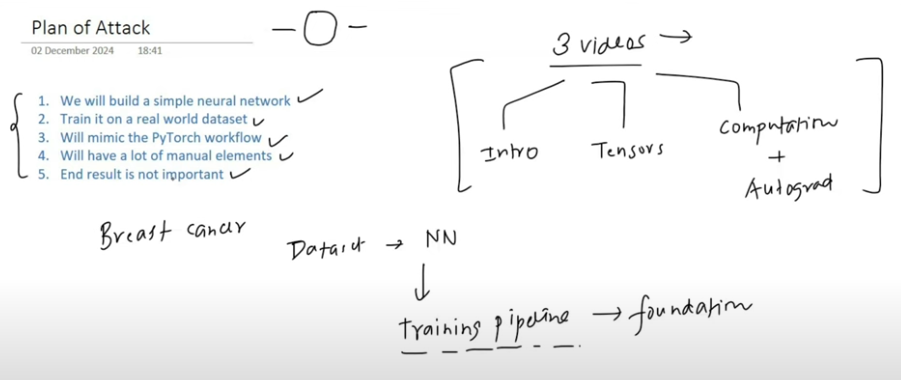

Goal is to show how we code a NN, how we train and predict but not accuracy or performance in this lecture

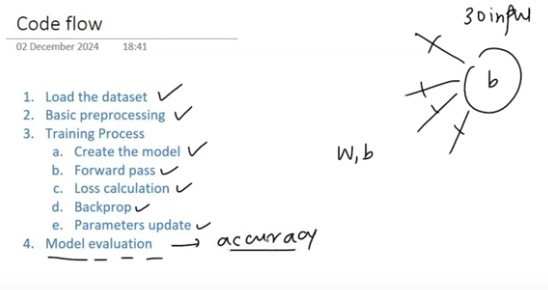

In [1]:
import numpy as np
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/gscdit/Breast-Cancer-Detection/refs/heads/master/data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
#dropping unneded columns

df.drop(columns=['id', 'Unnamed: 32'], inplace = True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Training and Testing data split

That line of code is using scikit-learn’s train_test_split function to prepare your dataset for a machine learning model.

Here's a breakdown:

- df.iloc[:, 1:]: This selects all rows, but only columns from index 1 onward (i.e. everything except the first column). This is typically used as the features/input variables, which we assign to X.

- df.iloc[:, 0]: This selects all rows of just the first column — typically the target/output variable, which we assign to y.

- test_size=0.2: This means 20% of the data will be used as the test set, and the remaining 80% will be used for training.


In [7]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, 1:], df.iloc[:, 0], test_size=0.2)

Scaling - In NN prefer to send data with same scale

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
X_train

array([[-1.57913871, -1.4403396 , -1.53778972, ..., -0.42916936,
         0.1532713 ,  1.17419221],
       [-0.51284699, -0.18475179, -0.54173376, ..., -0.43967086,
         0.1532713 , -0.65049151],
       [-0.29334117,  0.32302269, -0.25813449, ...,  0.06560157,
        -0.53461376, -0.10446664],
       ...,
       [-0.6957685 , -0.49634068, -0.71791523, ..., -0.05741607,
        -0.51987337, -0.69907613],
       [ 0.2526092 ,  1.4770556 ,  0.23094201, ...,  0.58317576,
        -0.385572  ,  0.59338517],
       [-0.87306166, -1.068741  , -0.89979309, ..., -1.06015981,
        -1.61721384, -0.57982297]])

In [10]:
y_train

,diagnosis
525,B
107,B
466,B
457,B
549,B
...,...
374,B
198,M
187,B
353,M


Label Encoding

This is a binary classification problem and NN cannot understand M and B so 0 and 1

In [11]:
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [12]:
y_train

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0,

Numpy Arrays to PyTorch Tensors

In [13]:
X_train_tensor = torch.from_numpy(X_train)
X_test_tensor = torch.from_numpy(X_test)

y_train_tensor = torch.from_numpy(y_train)
y_test_tensor = torch.from_numpy(y_test)

In [14]:
X_train_tensor.shape

torch.Size([455, 30])

This means we have 30 weights in this train dataset

In [15]:
y_train_tensor.shape

torch.Size([455])

In [16]:
X_test_tensor

tensor([[ 1.4796, -0.1201,  1.4557,  ...,  1.3843,  0.6168,  0.3565],
        [ 0.2273,  1.3524,  0.1308,  ..., -1.2712, -2.1692, -1.5786],
        [-1.4927, -0.8887, -1.4479,  ..., -0.9918, -0.7459, -0.5147],
        ...,
        [ 1.7807,  1.9548,  1.7120,  ...,  0.6387, -0.7410, -0.0194],
        [-0.0626, -0.5287, -0.0364,  ...,  0.3551,  0.2925, -0.2243],
        [ 1.0969,  0.5769,  1.0203,  ..., -0.3288, -0.8524, -0.9967]],
       dtype=torch.float64)

Defining the NN - Model

In [32]:
class MySimpleNN():

  def __init__(self, X):
    self.weights = torch.rand(X.shape[1], 1, dtype=torch.float64, requires_grad=True)
    self.bias = torch.zeros(1, dtype=torch.float64, requires_grad=True)

  def forward(self, X):
    z = torch.matmul(X, self.weights) + self.bias
    y_pred = torch.sigmoid(z)
    return y_pred

  def loss_function(self, y_pred, y):
    # Clamp predictions to avoid log(0)
    epsilon = 1e-7
    y_pred = torch.clamp(y_pred, epsilon, 1 - epsilon)

    #Calculate loss
    loss = -(y_train_tensor * torch.log(y_pred) + (1 - y_train_tensor) * torch.log(1 - y_pred)).mean()
    return loss


X.shape[1] will give 30
so we are defining weights with random values of 30,1 shape

Important Parameters

In [17]:
learning_rate = 0.1
epochs = 25

Training Pipeline

In [28]:
#create model
model = MySimpleNN(X_train_tensor)
model.weights

tensor([[0.7719],
        [0.2437],
        [0.9536],
        [0.7666],
        [0.1009],
        [0.6249],
        [0.9656],
        [0.3201],
        [0.6041],
        [0.5425],
        [0.1048],
        [0.7285],
        [0.9826],
        [0.6826],
        [0.4100],
        [0.8646],
        [0.4511],
        [0.9227],
        [0.4696],
        [0.5779],
        [0.4564],
        [0.3217],
        [0.4199],
        [0.6828],
        [0.5906],
        [0.4597],
        [0.1089],
        [0.1798],
        [0.7286],
        [0.5216]], dtype=torch.float64, requires_grad=True)

In [20]:
model.bias

tensor([0.], dtype=torch.float64, requires_grad=True)

In [41]:
model = MySimpleNN(X_train_tensor)

# define loop (jitne epochs define kiye so 25 here)
for epoch in range(epochs):
  # forward pass
  y_pred = model.forward(X_train_tensor)
  #print(y_pred)

  # loss calculate
  loss = model.loss_function(y_pred, y_train_tensor)
  #print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')

  # backward pass
  loss.backward()

  # paramters update
  with torch.no_grad():
    model.weights -= learning_rate * model.weights.grad
    model.bias -= learning_rate * model.bias.grad

  # zero gradients
  model.weights.grad.zero_()
  model.bias.grad.zero_()

  # print loss in each epoch
  print(f'Epoch: {epoch + 1}, Loss: {loss.item()}')


Epoch: 1, Loss: 4.309338589641378
Epoch: 2, Loss: 4.215358768868924
Epoch: 3, Loss: 4.114157052721486
Epoch: 4, Loss: 4.0046258195505855
Epoch: 5, Loss: 3.8847210168443884
Epoch: 6, Loss: 3.7578004542546863
Epoch: 7, Loss: 3.6246557948093248
Epoch: 8, Loss: 3.4871947209677865
Epoch: 9, Loss: 3.3446170477492845
Epoch: 10, Loss: 3.1971142039354654
Epoch: 11, Loss: 3.0394068987345046
Epoch: 12, Loss: 2.8771640440310606
Epoch: 13, Loss: 2.7161060148531435
Epoch: 14, Loss: 2.5553871837678845
Epoch: 15, Loss: 2.396515145316559
Epoch: 16, Loss: 2.2348571965457857
Epoch: 17, Loss: 2.076585251245274
Epoch: 18, Loss: 1.9173191687712619
Epoch: 19, Loss: 1.7577877325365512
Epoch: 20, Loss: 1.6067186779176625
Epoch: 21, Loss: 1.4662085671867688
Epoch: 22, Loss: 1.3377904251636423
Epoch: 23, Loss: 1.2256173178261756
Epoch: 24, Loss: 1.130826547072082
Epoch: 25, Loss: 1.0535826077484118


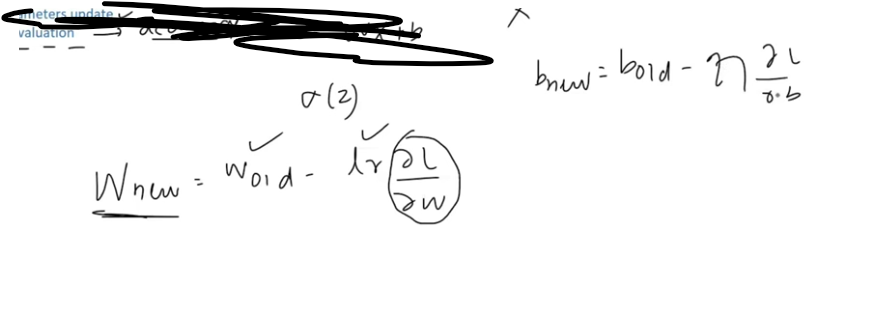

In [42]:
model.bias

tensor([-0.1022], dtype=torch.float64, requires_grad=True)

In [50]:
#model evaluation on test data now
with torch.no_grad():
  y_pred = model.forward(X_test_tensor)
  y_pred = (y_pred > 0.5).float()
  accuracy = (y_pred ==  y_test_tensor).float().mean()

#print(y_pred)
print(f'Accuracy agains original data: {accuracy.item()}')


Accuracy agains original data: 0.5092335939407349
